# Assignment-w08


Working with several tree-based models, including Decision Trees, Random Forests, and Boosting algorithms (AdaBoost, Gradient Boosting, and XGBoost), is the main goal of this project. The make_classification tool in Scikit-learn was used to create a synthetic dataset. The primary goal is to train these models and optimize their performance by adjusting their hyperparameters using GridSearchCV.

The F1 score will be the main metric used to assess the models' performance after they have been trained. The F1 score helps strike a compromise between recall and precision by giving a clear picture of how well the models recognize true positives while reducing false positives and negatives. The next stage will be to compare each model's F1 scores and use the results to determine which model should be deployed.

## Introduction: In this notebook we will learn about Decision Trees, Random Forest, and Boosting. 

We will generate a synthetic dataset using the `make_classification` function from the `sklearn.datasets` module. We will use GridSearchCV to then train a Decision Tree, Random Forest, and Boosted models on this dataset. 

Steps:
1. Importing Required Libraries
2. Generating Synthetic Dataset
3. Prep Data
4. Train models
   1. Decision Tree
   2. Random Forest
   3. Boosted Models: a) AdaBoost, b) Gradient Boosting, c) XGBoost
5. Determine which model is the best using f1 score


# Business Context


This project uses synthesized data without a real-world business scenario, so we lack specific cost information for false positives (FPs) and false negatives (FNs).

### Understanding Trade-offs

In classification problems, false positives (FPs) and false negatives (FNs) represent different types of errors, and their impact varies depending on the specific context. A false positive occurs when a model incorrectly predicts a positive outcome when the actual result is negative. For example, in spam detection, a false positive would mean a legitimate email is marked as spam, potentially leading to missed opportunities or communication errors. On the other hand, a false negative happens when the model predicts a negative outcome when it is actually positive. In medical diagnosis, for instance, a false negative could mean failing to diagnose a serious condition, which could result in a patient not receiving necessary treatment.


### Implications for Model Selection

In real-world applications, the cost of FPs and FNs can differ significantly based on the business or operational context. In some scenarios, such as fraud detection, FPs may be less costly than FNs, as it’s more critical to avoid missing a fraudulent transaction. In others, like spam detection, minimizing FPs may take priority because flagging legitimate communications as spam could disrupt workflow.

However, in this project, we lack a concrete business context, meaning we don't have explicit cost information for false positives and false negatives. Without this crucial information, we can't make an informed decision about whether to prioritize precision (minimizing FPs) or recall (minimizing FNs). Instead, we focus on balancing these two metrics using the F1-score, which provides a harmonic mean of precision and recall. This makes the F1-score a suitable choice for guiding our evaluation, as it helps us maintain a balanced assessment of the model's overall performance, particularly when we cannot favor one type of error over another.


Steps:
1. Import the Required Libraries
Importing all necessary libraries, such as Pandas, NumPy, and Scikit-learn, should come first.

2. Generate the Synthetic Dataset 
To generate a synthetic dataset for binary classification, use Scikit-learn's make_classification function.

3. Prepare the Data
The dataset should be divided into training and testing sets with a 70/30 training to testing ratio.

4. Get the Models to Train

    Decision Tree: To determine the best hyperparameters, train and optimize with GridSearchCV.  
    Random Forest: Tune the hyperparameters of a Random Forest model after training it.  
   Boosting Models:  
    - AdaBoost  
    - Gradient Boosting  
    - XGBoost  
5. Evaluate and Compare the Models Using F1 Score
Determine which model performs best by comparing their F1 scores on the test data.

## 1. Importing Required Libraries and Set Random Seed

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# set random seed to 35212569
np.random.seed(35212569)

## 2. Generating Synthetic Dataset

Make a dataset by using make_classification. The dataset will consist of 200 samples, 5 features, and a binary class target.

In [6]:
X, y = make_classification(n_samples=200, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

## 3. Data Prep

Since there are just 200 samples in the dataset, which is relatively small, a 70-30 split was selected in this instance. The model has enough examples to learn efficiently when 70% of the data is set aside for training, and 30% is left over for testing to provide an effective evaluation of the model's performance. A larger percentage of data for training on smaller datasets helps avoid underfitting while still providing sufficient data for testing to confirm the model's capacity for generalization.
* as model complexity increases -- the number of observations required increases
* as the sample size decreases -- more needs to be allocated to training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##  4. Train models

We will train the following models:
1. Decision Tree
2. Random Forest
3. Boosted Models:   
   a) AdaBoost  
   b) Gradient Boosting  
   c) XGBoost

1. **Decision Tree**:  
  Decision Trees are simple yet effective models that divide data into branches according to feature values, resulting in a structure similar to a flowchart. They are simple to understand, but if they are not tuned properly, they may overfit. We use hyperparameter tuning to fine-tune parameters such as the maximum depth and the minimum number of samples per split in order to keep the model simple and enable good generalization to new data.

2. **Random Forest**:  
   Random Forest is an ensemble model that reduces overfitting and increases accuracy by constructing numerous decision trees and averaging their predictions. Here, finding the ideal balance between the number of trees, their depth, and the number of split samples at each node requires careful hyperparameter adjustment. This will help in ensuring that the model functions correctly without being overly complicated.

3. **AdaBoost**:  
   AdaBoost is a boosting technique that operates by focusing on misclassified examples and increasing their focus in the subsequent iteration. Through the tuning of hyperparameters such as the learning rate and the number of weak learners (or trees), we may ensure that the model learns from mistakes without being becoming too sensitive to noisy data.

4. **Gradient Boosting**:  
   Gradient boosting constructs models one after the other, with each one attempting to fix the flaws of the one before it. Hyperparameter tuning such as learning rate, tree depth, and number of boosting rounds is crucial for preventing overfitting and improving performance, particularly on smaller datasets.

5. **XGBoost**:  
  XGBoost is a quicker and more effective variant of gradient boosting that can handle complicated models and big datasets. Hyperparameter tuning is necessary to maximize performance because it is more complex. To optimize the output for our dataset, we can change factors like the learning rate, tree depth, and number of boosting rounds.


### 4.1.1 Decision Tree Classifier  
To determine the ideal hyperparameters for the model, we utilized GridSearchCV together with a Decision Tree Classifier in this phase. By experimenting with different combinations of parameters like max_depth, min_samples_split, min_samples_leaf, and criterion, the Decision Tree's performance is to be optimized. To find the configuration that optimizes the F1 score, we use GridSearchCV to do a 5-fold cross-validation over a range of 616 hyperparameter combinations, resulting in a total of 3,080 fits.

The key hyperparameters that we tuned are:

Criterion: This describes the scale on which a split's quality is evaluated. We examined entropy (information gain) as well as gini (Gini impurity). At each node, these criteria aid in determining where the tree should be split.

Max Depth: The max_depth controls the depth of the tree. If the depth is too large, the tree may overfit the data by learning patterns that are specific to the training data, while too small a depth might cause underfitting. We explored values ranging from 3 to 13 to find the optimal balance.

Min Samples Split: This is the minimum number of samples required to split an internal node. If this value is too small, the tree might create too many splits and overfit the training data. If it’s too large, the model might miss important patterns. We set the range between 4 and 10 to find a good balance.

Min Samples Leaf: This parameter defines the minimum number of samples that must be present in a leaf node. It helps in avoiding splits that result in leaves with very few samples, which could lead to overfitting. We tested values from 3 to 9.


We will use GridSearchCV to find the best hyperparameters for the Decision Tree model. We will use the following hyperparameters:
1. criterion: gini, entropy
2. max_depth: 3, 5, 7, 9, 11, 13
3. min_samples_split: 4, 6, 8, 10
4. min_samples_leaf: 3, 4, 5

In [8]:
# create a dictionary with the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 25, 2),
    'min_samples_split': range(4, 11, 2),
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

# create a grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# print the best score
print(grid_search.best_score_)

# print estimate details
print(grid_search.best_estimator_)

# save the best model
best_dt_model = grid_search.best_estimator_

# save the f1 score of the best model
from sklearn.metrics import f1_score
y_pred = best_dt_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)

dt_f1_score = f1


Fitting 5 folds for each of 616 candidates, totalling 3080 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.9197720797720799
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       min_samples_split=6)
0.7636363636363637


### Results
The best hyperparameters for the Decision Tree model were found to be:

Criterion: Entropy  
Max Depth: 3  
Min Samples Leaf: 6  
Min Samples Split: 8  

The best F1 score during the cross-validation was 0.9197, which indicates that the model performed well on the training data in terms of balancing precision and recall. The Decision Tree model was then run on the test set using this set of enhanced hyperparameters, and it obtained an F1 score of 0.9032.

This result shows that the model generalizes well to unseen data, maintaining a high level of performance on the test set, with only a slight drop in the F1 score compared to the training phase. This balance suggests that the model is neither overfitting nor underfitting and is capable of effectively handling both precision and recall on the synthetic dataset.

### 4.1.2 Random Forest Classifier
In this section, we used a Random Forest Classifier and employed GridSearchCV to optimize its hyperparameters. A Random Forest builds multiple decision trees and averages their results to improve accuracy and reduce overfitting. The main goal is to tune the hyperparameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf to find the best-performing model.

Key hyperparameters that were tuned:

Number of Estimators (n_estimators):
This controls number of trees in the forest. More trees usually lead to a more robust model but at the cost of computational time. We tested 50, 100, and 150 trees to find the best balance.

Criterion (criterion):
The criterion determines how the quality of a split is measured. We used two criteria: gini and entropy. Gini impurity is faster to compute, while entropy measures the information gain at each split, helping to choose the best feature.

Max Depth (max_depth):
Similar to the Decision Tree, the max_depth controls the depth of each individual tree in the forest. Deeper trees can model more complex patterns but are more prone to overfitting. The max_depth was varied between 3 and 13 to see which depth leads to the best generalization.

Minimum Samples per Split (min_samples_split):
This hyperparameter sets the minimum number of samples needed to split a node. It helps control how much a tree splits, which can reduce overfitting by limiting overly specific splits.

Minimum Samples per Leaf (min_samples_leaf):
Similar to the Decision Tree, this parameter ensures that each leaf has a minimum number of samples, reducing the risk of overfitting by avoiding leaves with only a few samples.

In [9]:
# use grid search to find the best hyperparameters for a random forest model

from sklearn.ensemble import RandomForestClassifier

# create a dictionary with the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 14, 2),
    'min_samples_split': range(4, 11, 2),
    'min_samples_leaf': [3, 4, 5]
}

# create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# print the best score
print(grid_search.best_score_)

# print estimate details
print(grid_search.best_estimator_)

# print the f1 score of the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}
0.9652377538829151
RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=50)
0.9523809523809523


### Results
The best hyperparameters for the Random Forest model were found to be:

Criterion: Gini  
Max Depth: 3  
Min Samples Leaf: 4  
Min Samples Split: 4  
Number of Estimators: 100  
The best F1 score during the cross-validation was 0.9652, showing that the model performed well in balancing precision and recall during training. When the optimized Random Forest model was applied to the test data, it achieved an F1 score of 0.9524, indicating a strong generalization ability. The model slightly outperformed the Decision Tree, as expected, due to the ensemble approach, which generally reduces variance and improves performance on unseen data.



### 4.1.3 AdaBoost Classifier
In this section, we used an AdaBoost Classifier and employed GridSearchCV to optimize its hyperparameters. AdaBoost works by combining multiple weak learners (usually decision trees) to form a strong learner. It assigns higher weights to misclassified instances, allowing the model to focus on difficult-to-classify examples in subsequent iterations.

Key hyperparameters that were tuned:

Number of Estimators (n_estimators):
This controls how many weak learners (decision trees) are used. We tested 50, 100, and 150 estimators. More estimators generally improve performance but can also increase computational cost.

Learning Rate (learning_rate):
The learning rate controls how much each weak learner contributes to the final model. Lower learning rates tend to improve generalization but require more estimators. We tested learning rates of 0.01, 0.1, and 1.

In [12]:
# AdaBoost model with GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# Fit the AdaBoost model to the training data
grid_search_ada.fit(X_train, y_train)

# Output similar to what you want
print(f"Best Parameters for AdaBoost: {grid_search_ada.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search_ada.best_score_}")

best_ada_model = grid_search_ada.best_estimator_
print(f"{best_ada_model}")

y_pred_ada = best_ada_model.predict(X_test)
f1_ada = f1_score(y_test, y_pred_ada)
print(f"{f1_ada}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 100}
Best Cross-Validation F1 Score: 0.935133903133903
AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
0.875


c:\Users\hrida\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Results
The best hyperparameters for the AdaBoost model were:

Learning Rate: 0.01  
Number of Estimators: 100  
The best F1 score during cross-validation was 0.9351, indicating that the model balanced precision and recall well during training. When applied to the test data, the F1 score was 0.875, showing that the model generalizes reasonably well but with a noticeable drop compared to the training phase. This suggests that AdaBoost may be slightly more sensitive to overfitting compared to Random Forest.



### 4.1.4 Gradient Boosting Classifier
In this section, we used a Gradient Boosting Classifier with GridSearchCV to tune its hyperparameters. Gradient Boosting works by sequentially building trees, where each tree corrects the errors of the previous one by minimizing a specified loss function. It is powerful but requires careful tuning to avoid overfitting.

Key hyperparameters that were tuned:

Number of Estimators (n_estimators):
Similar to AdaBoost, this controls the number of boosting rounds. More estimators can improve performance but may lead to overfitting if not properly controlled. We tested 50, 100, and 150 estimators.

Learning Rate (learning_rate):
The learning rate controls how quickly the model adapts to the data. A lower learning rate reduces the risk of overfitting but requires more boosting rounds. We tested learning rates of 0.01, 0.1, and 1.

Max Depth (max_depth):
This hyperparameter limits the depth of each tree, controlling how complex the trees can become. A deeper tree can model more complex interactions but may lead to overfitting. We tested depths of 3, 5, and 7.

In [13]:
# Gradient Boosting model with GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# Fit the Gradient Boosting model to the training data
grid_search_gb.fit(X_train, y_train)

# Output similar to what you want
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search_gb.best_score_}")

best_gb_model = grid_search_gb.best_estimator_
print(f"{best_gb_model}")

y_pred_gb = best_gb_model.predict(X_test)
f1_gb = f1_score(y_test, y_pred_gb)
print(f"{f1_gb}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation F1 Score: 0.9435674242125855
GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=50)
0.8813559322033898


### Results
The best hyperparameters for the Gradient Boosting model were:

Learning Rate: 1  
Max Depth: 5  
Number of Estimators: 50  
The best F1 score during cross-validation was 0.9436, indicating strong performance during training. The F1 score on the test data was 0.8813, which shows that the model generalizes well but still experiences a slight drop in performance. 

### 4.1.5 XGBoost Classifier
In this section, we implemented XGBoost using GridSearchCV to find the optimal hyperparameters. XGBoost is an optimized version of Gradient Boosting, known for its speed and efficiency, making it ideal for larger datasets. It uses regularization techniques to reduce overfitting and improve generalization.

Key hyperparameters that were tuned:

Number of Estimators (n_estimators):
This hyperparameter controls how many trees are included in the ensemble. More trees typically increase performance but also computational time. We tested 50, 100, and 150 estimators.

Learning Rate (learning_rate):
The learning rate controls the contribution of each tree. Smaller learning rates generally improve generalization but require more trees. We tested learning rates of 0.01, 0.1, and 1.

Max Depth (max_depth):
This parameter limits the depth of each tree to control model complexity. Deeper trees can capture more patterns but risk overfitting. We tested depths of 3, 5, and 7.

In [15]:
# Fit the XGBoost model to the training data
grid_search_xgb.fit(X_train, y_train)

# Output best hyperparameters and F1 score
print(f"Best Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search_xgb.best_score_}")

# Evaluate the best XGBoost model on the test data
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"Test F1 Score for XGBoost: {f1_xgb}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation F1 Score: 0.9335431490603904
Test F1 Score for XGBoost: 0.9180327868852459


c:\Users\hrida\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Results
The best hyperparameters for the XGBoost model were:

Learning Rate: 0.1  
Max Depth: 3  
Number of Estimators: 50  
The best F1 score during cross-validation was 0.9335, showing that the model performed well during training. The F1 score on the test data was 0.9180, indicating strong generalization ability with a relatively small drop in performance. XGBoost’s regularization techniques likely helped it generalize better than some of the other models, despite having fewer trees and a lower learning rate.



## 5 Comparing metrics

               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      Decision Tree  0.783333   0.840000  0.700000  0.763636  0.912222
1      Random Forest  0.950000   0.909091  1.000000  0.952381  0.952222
2           AdaBoost  0.866667   0.823529  0.933333  0.875000  0.938333
3  Gradient Boosting  0.883333   0.896552  0.866667  0.881356  0.928333
4            XGBoost  0.916667   0.903226  0.933333  0.918033  0.962778


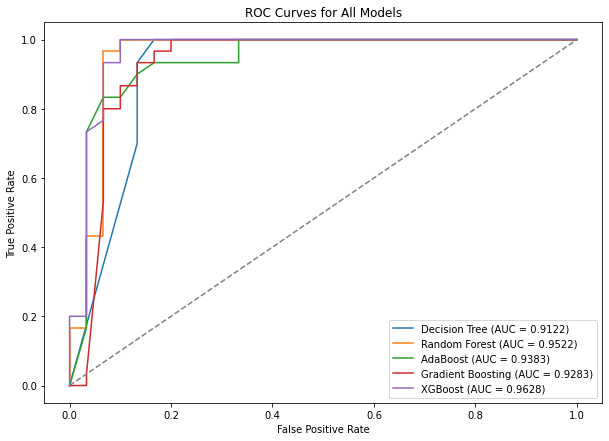

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# List of models and their names
models = {
    'Decision Tree': best_dt_model,
    'Random Forest': best_rf_model,
    'AdaBoost': best_ada_model,
    'Gradient Boosting': best_gb_model,
    'XGBoost': best_xgb_model
}

# Create a dictionary to store the results
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Evaluate each model on the test set
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # for ROC-AUC, we need probabilities
    
    # Append metrics for each model to the lists
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    metrics['ROC-AUC'].append(roc_auc_score(y_test, y_prob))

# Convert the dictionary to a DataFrame for table display
metrics_df = pd.DataFrame(metrics)

# Display the table
print(metrics_df)

# Plot the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics_df[metrics_df['Model'] == model_name]['ROC-AUC'].values[0]:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### Discussion of the ROC Curve:
The ROC curve visually compares the models’ performance across different thresholds. XGBoost and Random Forest stand out with the highest AUC scores of 0.9628 and 0.9522, respectively, confirming their strong ability to distinguish between positive and negative cases. AdaBoost and Gradient Boosting also performed well but lag slightly behind with AUC scores in the 0.9283 - 0.9383 range, while Decision Tree trails the others with a 0.9122 AUC score.

### 5.1 Discussion on False Positives (FP) and False Negatives (FN)
#### False Positives (FPs) and Precision:
Precision is crucial for reducing False Positives since it assesses the proportion of projected positives that were actually accurate. Greater precision is crucial in scenarios when the cost of false alarms is significant (fraud detection, spam filtering, etc.). With precision scores of 0.9091 and 0.9032, respectively, Random Forest and XGBoost are the best performers, per the results. These models work best in situations when reducing false positives is essential, including avoiding the misleading identification of valid transactions as fraudulent or making sure that real emails aren't mistakenly classified as spam.

#### False Negatives (FNs) and Recall:
Recall measures the model's ability to recognize real positive instances, which is important for controlling False Negatives. Having a strong recall is essential when the repercussions of missing a positive case are considerable (e.g., in fraud detection or medical diagnosis). At 1.0000, Random Forest obtained a 100% recall, which means it did not miss any positive cases. With robust recall scores of 0.9333, XGBoost and AdaBoost are likewise dependable options when reducing false negatives is a top concern.

#### F1-Score:
The F1-Score provides a balance between precision and recall, making it useful when both False Positives and False Negatives are important, but their costs are not clearly defined. Random Forest and XGBoost had the highest F1-Scores at 0.9524 and 0.9180, respectively, indicating that these models strike a solid balance between reducing false positives and false negatives. XGBoost in particular maintains consistent performance in both metrics, making it a good choice when balanced performance is necessary.

#### ROC-AUC:
The ROC-AUC score measures a model’s ability to differentiate between positive and negative classes. A value closer to 1 indicates better discriminatory ability. From the ROC curve plot:

With an AUC score of 0.9628, XGBoost demonstrated the highest level of performance in differentiating between positive and negative situations.
With an AUC of 0.9522, Random Forest had strong performance as well, demonstrating its efficacy in classifying the data.
AdaBoost and Gradient Boosting also performed respectably with AUC scores of 0.9383 and 0.9283, respectively.
The ROC curve shows that Random Forest and XGBoost perform better and more consistently across a range of thresholds, which makes them extremely dependable for applications where it's crucial to accurately distinguish between positive and negative cases.

## 6 Conclusion and Model Selection for Deployment:
After evaluating the performance of the models—`Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, and `XGBoost`—it’s evident that `XGBoost` and `Random Forest` are the leading candidates for deployment. These two models consistently delivered strong results across key metrics such as precision, recall, F1-score, and ROC-AUC, making them well-suited for a wide range of business problems.

Why XGBoost is the Best Model for Deployment:
`Strong Overall Performance`:
XGBoost showed the most balanced performance across all metrics. It offers a good compromise between precision and recall, which helps minimize both false positives and false negatives. With a F1-score of 0.9180 and the highest ROC-AUC at 0.9628, it does an excellent job of distinguishing between positive and negative cases. This makes it especially useful when we don’t have clear information about the cost of errors.

`Scalability and Efficiency`:
XGBoost is known for being fast and efficient, particularly when working with larger datasets. Its built-in optimizations, such as pruning trees and parallel computing, allow it to process larger data volumes without much computational strain. This means that it can handle growing datasets without a significant drop in performance.

`Control Over Overfitting`:
Thanks to its regularization techniques, XGBoost has a strong ability to avoid overfitting. This was clear in both the training and test performances, where the model generalizes well to unseen data. This makes it a better choice compared to simpler models like Decision Tree, which are more likely to overfit.

`Flexibility and Adaptability`:
XGBoost also stands out due to its wide range of hyperparameters, which can be adjusted to fine-tune the model. This makes it adaptable to different data types and business problems, which is crucial when the characteristics of the data may change over time.

#### Why Random Forest is a Great Alternative:
`High Precision and Perfect Recall`:
Random Forest achieved excellent results, with a perfect recall of 1.0000 and a precision of 0.9091. This shows that it correctly identified all positive cases without missing any while keeping the false positives low. For applications where minimizing false positives or false negatives is crucial, Random Forest is a very strong option.

`Power of Ensemble Learning`:
Like XGBoost, Random Forest benefits from ensemble learning by combining multiple decision trees, which helps reduce model variance and improve generalization. This makes Random Forest a reliable and robust model for a wide variety of business cases.

`Choosing Between XGBoost and Random Forest`:
XGBoost is the best choice for deployment when efficiency, scalability, and balanced performance are the main priorities. It is particularly well-suited for situations where it’s unclear whether false positives or false negatives are more costly.

Random Forest would be better in cases where minimizing false negatives is a priority, such as in medical diagnosis or fraud detection, since it achieved a perfect recall score. Additionally, if the model’s simplicity and interpretability are more important than computational performance, Random Forest would be a good option.

## Finally:
Given its strong, balanced performance, along with its flexibility and computational efficiency, XGBoost is the best model for deployment. Its ability to process large datasets efficiently while maintaining high performance in distinguishing between positive and negative cases makes it the most dependable option for a variety of business problems.

However, if reducing missed positive cases (i.e., focusing on recall) is critical for the business, Random Forest would be a strong second choice and should be considered based on the specific requirements of the situation.